In [1]:
# !pip list

In [2]:
# !pip install gradio

In [3]:
# !pip install ultralytics

In [4]:
import gradio as gr
import torch
from PIL import Image
from ultralytics import YOLO

d:\miniconda\envs\detectron2\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
#加载模型
model=YOLO('yolov8s.pt')

In [6]:
result=model.predict(source='https://new.fire114.cn/uploads/kindeditor/image/20211108/20211108152434_70082.jpg',conf=0.25)
result

FileNotFoundError: /content/yologradio/input_image/detectron.png does not exist

In [ ]:
dir(result[0])

In [ ]:
result[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0., 3.])
conf: tensor([0.8728, 0.6646])
data: tensor([[337.2215, 145.3342, 478.7090, 481.8060,   0.8728,   0.0000],
        [387.0659, 233.7575, 533.9402, 582.3260,   0.6646,   3.0000]])
id: None
is_track: False
orig_shape: (628, 937)
shape: torch.Size([2, 6])
xywh: tensor([[407.9653, 313.5701, 141.4875, 336.4717],
        [460.5031, 408.0418, 146.8743, 348.5685]])
xywhn: tensor([[0.4354, 0.4993, 0.1510, 0.5358],
        [0.4915, 0.6497, 0.1567, 0.5550]])
xyxy: tensor([[337.2215, 145.3342, 478.7090, 481.8060],
        [387.0659, 233.7575, 533.9402, 582.3260]])
xyxyn: tensor([[0.3599, 0.2314, 0.5109, 0.7672],
        [0.4131, 0.3722, 0.5698, 0.9273]])

In [ ]:
result[0].speed #

{'preprocess': 4.302740097045898,
 'inference': 455.83343505859375,
 'postprocess': 1.2862682342529297}

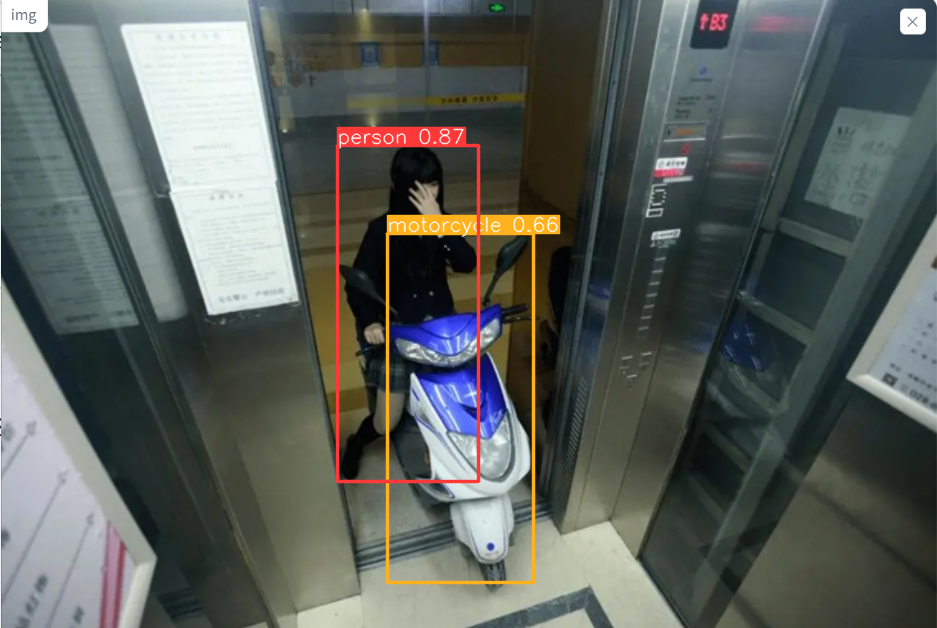

In [ ]:
im_array=result[0].plot() #把预测的结果变成一个numpyArray的数组
im =Image.fromarray(im_array[...,::-1]) #把这个数组变成图片的形式
im

In [ ]:
#部署到gradio
def gradio_image(img):
  # 转换PIL图像为RGB
  if img.mode != 'RGB':
    img=img.revert('RGB')

  #使用模型进行预测
  results=model.predict(source=img,conf=0.25)
  im_array=results[0].plot()

  #转化结果为PIL图像并返回
  pil_img=Image.fromarray(im_array[...,::-1])
  return pil_img


#创建gradio界面
demo = gr.Interface(
    fn=gradio_image,
    inputs=gr.Image(type='pil'),
    outputs="image",
    examples=['/content/yologradio/input_image/detectron.png'],
    title="DA SpareRCNN算法展示"
).launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://7cf8a031740f95d4ca.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
